# Taking our Generated Distributions and Creating OCHL data

Now that we have these generated distributions on `OCHL` data, based on real historical data, we can simulate these metrics in our real data.

Let's quickly load in the distributions now:

In [2]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
real_p_changes = pd.read_csv('analytics/ochl_p_changes_only.csv')

real_p_changes.head()

,o_percent,c_percent,h_percent,l_percent
0,0.779403,-0.499168,1.024608,-1.304843
1,0.813102,-0.836169,1.032236,-1.009169
2,-0.655831,0.416310,0.923867,-0.684346
3,-0.272485,-0.203971,1.102929,-0.626473
4,-0.062980,-0.417955,0.938967,-0.458033


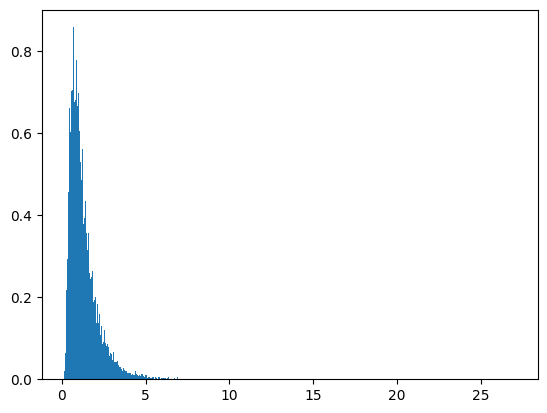

In [4]:
o_dist = real_p_changes['h_percent'].round(2)

n, bins, _ = plt.hist(o_dist, bins=500, density=True)
plt.show()

Cool thing about `plt.hist()` is that it returns information regarding the distribution! I didn't know that until now, so it's cool to learn new things about this library.

Now that we got this information, we need to make some small changes to it. 

First thing is removing an element from the `bins` return value, so both `n` and `bins` have the same array size.

Second is performing a $softmax(x)$ on the array, so it all sums to $1$. This allows us to use `np.random.choice()` to randomly sample our distribution.

In [5]:
from scipy.special import softmax

values = np.delete(bins, 0)
print(bins)
probabilities = softmax(n)

print('soft_n\n', probabilities)
print('\nbins_downsized\n', values)

for x in n:
    print(x)


[ 0.15     0.20382  0.25764  0.31146  0.36528  0.4191   0.47292  0.52674
  0.58056  0.63438  0.6882   0.74202  0.79584  0.84966  0.90348  0.9573
  1.01112  1.06494  1.11876  1.17258  1.2264   1.28022  1.33404  1.38786
  1.44168  1.4955   1.54932  1.60314  1.65696  1.71078  1.7646   1.81842
  1.87224  1.92606  1.97988  2.0337   2.08752  2.14134  2.19516  2.24898
  2.3028   2.35662  2.41044  2.46426  2.51808  2.5719   2.62572  2.67954
  2.73336  2.78718  2.841    2.89482  2.94864  3.00246  3.05628  3.1101
  3.16392  3.21774  3.27156  3.32538  3.3792   3.43302  3.48684  3.54066
  3.59448  3.6483   3.70212  3.75594  3.80976  3.86358  3.9174   3.97122
  4.02504  4.07886  4.13268  4.1865   4.24032  4.29414  4.34796  4.40178
  4.4556   4.50942  4.56324  4.61706  4.67088  4.7247   4.77852  4.83234
  4.88616  4.93998  4.9938   5.04762  5.10144  5.15526  5.20908  5.2629
  5.31672  5.37054  5.42436  5.47818  5.532    5.58582  5.63964  5.69346
  5.74728  5.8011   5.85492  5.90874  5.96256  6.01638

In [6]:
for x in range(100):
    print(np.random.choice(values, p=probabilities))


24.58428
4.50942
26.360339999999997
26.145059999999997
24.47664
1.3878599999999999
14.9505
12.58242
21.893279999999997
18.77172
0.52674
2.41044
2.62572
21.4089
17.533859999999997
7.46952
2.46426
1.4954999999999998
23.93844
1.33404
12.5286
3.48684
8.54592
25.01484
3.27156
20.54778
3.48684
8.007719999999999
20.22486
9.72996
25.283939999999998
23.2926
24.69192
25.176299999999998
7.1466
12.85152
17.856779999999997
15.70398
23.34642
11.882760000000001
16.888019999999997
16.888019999999997
22.91586
5.04762
1.3878599999999999
22.646759999999997
20.493959999999998
0.47292
17.15712
15.27342
10.21434
24.961019999999998
26.467979999999997
23.077319999999997
10.59108
0.6343799999999999
25.176299999999998
19.2561
26.037419999999997
10.48344
0.6343799999999999
17.48004
17.318579999999997
11.882760000000001
8.38446
23.23878
1.33404
8.33064
3.48684
20.22486
7.6848
20.65542
13.17444
2.0337
5.962560000000001
1.28022
20.709239999999998
10.59108
10.53726
0.79584
1.81842
7.09278
11.02164
15.11196
20.97834


Now we collect all of this into a function for easier use:

In [7]:
def custom_sample_distribution(dist, num_bins=500):

    plt.ioff()

    n, bins, _ = plt.hist(dist, bins=num_bins, density=True);

    values = np.delete(bins, 0)
    probabilities = softmax(n)

    return values, probabilities

In [8]:
dist_labels = ['o_percent', 'c_percent', 'h_percent', 'l_percent']

dist_samples = []

for label in dist_labels:
    dist = real_p_changes[label]
    x_values, x_proba = custom_sample_distribution(dist)

    dist_samples.append([x_values, x_proba])

dist_samples = np.asarray(dist_samples)

print(dist_samples.shape)

(4, 2, 500)


`dist_samples.shape` corresponds to 4 Metrics, 2 attributes per metric, and 500 values per attribute.

In [9]:
dist_samples[0]

array([[-1.10396352e+01, -1.09991310e+01, -1.09586267e+01,
        -1.09181225e+01, -1.08776183e+01, -1.08371141e+01,
        -1.07966099e+01, -1.07561057e+01, -1.07156015e+01,
        -1.06750973e+01, -1.06345931e+01, -1.05940889e+01,
        -1.05535847e+01, -1.05130805e+01, -1.04725763e+01,
        -1.04320720e+01, -1.03915678e+01, -1.03510636e+01,
        -1.03105594e+01, -1.02700552e+01, -1.02295510e+01,
        -1.01890468e+01, -1.01485426e+01, -1.01080384e+01,
        -1.00675342e+01, -1.00270300e+01, -9.98652576e+00,
        -9.94602155e+00, -9.90551734e+00, -9.86501313e+00,
        -9.82450893e+00, -9.78400472e+00, -9.74350051e+00,
        -9.70299630e+00, -9.66249209e+00, -9.62198789e+00,
        -9.58148368e+00, -9.54097947e+00, -9.50047526e+00,
        -9.45997105e+00, -9.41946685e+00, -9.37896264e+00,
        -9.33845843e+00, -9.29795422e+00, -9.25745001e+00,
        -9.21694581e+00, -9.17644160e+00, -9.13593739e+00,
        -9.09543318e+00, -9.05492897e+00, -9.01442477e+0

Awesome. Next up is using this information to inform our generated stock data. So let's pull up an 'old' friend: `generate_data()` from `data_gen.py`

This is going to be where we make our changes.
- Change the generated stock value into a 'global average'
- Add a parameter `ochl=True`
- Generate `OCHL` data using the distribution we generated
- Store all of this information in a `DataFrame`

In [45]:
from datetime import timedelta

def gen_new_val(old_val, percent_change):
        to_add = old_val * percent_change / 100
        new_val = old_val + to_add

        return new_val


def generate_high_and_low(data, distributions):
    mins, maxes = [], []
    high, low = [], []

    for ind in data.index:
        open = data['Open'][ind]
        close = data['Close'][ind]

        if open > close:
            maxes.append(open)
            mins.append(close)
        else:
            maxes.append(close)
            mins.append(open)

    for val in maxes:
        h_random_percent = np.random.choice(a=distributions[2][0], p=distributions[2][1])
        high.append(gen_new_val(val, h_random_percent))

    for val in mins:
        l_random_percent = np.random.choice(a=distributions[3][0], p=distributions[3][1])
        low.append(gen_new_val(val, l_random_percent))
        
    data['High'] = high
    data['Low'] = low

    return data


def generate_data(numVals, volatility, init_val=1, moving_vol=True, ochl_dist=None):
    rng = np.random.default_rng()
    
    vals = [init_val]
    vols = [volatility]
    open, close = [0], [0]

    o_random_percent = np.random.choice(a=ochl_dist[0][0], p=ochl_dist[0][1])
    c_random_percent = np.random.choice(a=ochl_dist[1][0], p=ochl_dist[1][1])

    open[0] = (gen_new_val(vals[0], o_random_percent))
    close[0] = (gen_new_val(vals[0], c_random_percent))


    for x in range(numVals):
        rnd = rng.random()
        change_percent = 1.5 * volatility * rnd
        if change_percent > volatility:
            change_percent -= (2 * volatility)
        change_amount = vals[x] * change_percent
        vals.append(vals[x] + change_amount)

        if moving_vol:
            if volatility >= 0.2:
                # print("Volatility over 20%:    ", volatility)
                p = [0.80, 0.10, 0.10]
            elif volatility <= 0.1:
                # print("Volatility under 10%:   ", volatility)
                p = [0.10, 0.10, 0.80]
            else:
                p = [0.30, 0.40, 0.30]

            vol_change = rng.random()
            vol_direction = np.random.choice([-1, 0, 1], p=p)
            volatility += vol_change * vol_direction * 0.03
            vols.append(volatility)

        
        o_random_percent = np.random.choice(a=ochl_dist[0][0], p=ochl_dist[0][1])
        c_random_percent = np.random.choice(a=ochl_dist[1][0], p=ochl_dist[1][1])

        open.append(gen_new_val(vals[x], o_random_percent))
        close.append(gen_new_val(vals[x], c_random_percent))
    

    start_date = '1998-03-22'
    end_date = pd.to_datetime(start_date) + timedelta(days=numVals)

    dates = pd.date_range(start_date, end_date)
    

    data = [vals, open, close]
    data = np.array(data).T

    stock_data = pd.DataFrame(data=data, columns=['avg_price', 'Open', 'Close'], index=dates)

    stock_data = generate_high_and_low(stock_data, ochl_dist)

    return stock_data



In [57]:
fake_data = generate_data(1009, 0.15, init_val=1, ochl_dist=dist_samples)

fake_data.head(10)

,avg_price,Open,Close,High,Low
1998-03-22,1.000000,0.939019,1.029562,1.118655,0.897820
1998-03-23,1.121295,1.006661,1.078391,1.365602,0.902719
1998-03-24,1.258204,1.189169,1.131045,1.425866,1.023484
1998-03-25,1.387149,1.294615,1.338982,1.415928,1.267508
1998-03-26,1.395936,1.427290,1.373738,1.457064,1.255700
1998-03-27,1.451895,1.305722,1.455262,1.603912,1.206506
1998-03-28,1.624328,1.480972,1.502087,1.615090,1.409580
1998-03-29,1.430298,1.633832,1.621504,1.788409,1.417299
1998-03-30,1.256493,1.388844,1.495263,1.825888,1.288622
1998-03-31,1.335586,1.314229,1.356563,1.374638,1.240491


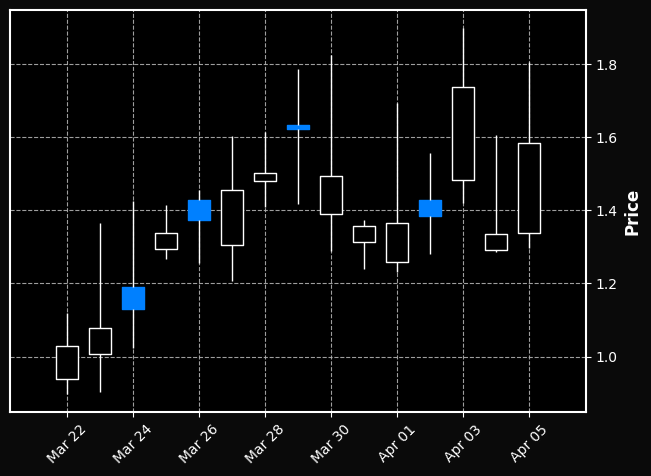

In [58]:
import mplfinance as fplt

fake_ochl = fake_data[['Open', 'High', 'Low', 'Close']]

fplt.plot(fake_ochl[:15], type='candle', style='mike')


Got it! We needed to create a separate function to process the `'High'` and `'Low'` metrics for each price. Otherwise, I was running into an error where the High and Low for some days would actually go inside the body of the candlestick, which is absolutely not what we wanted at all. 

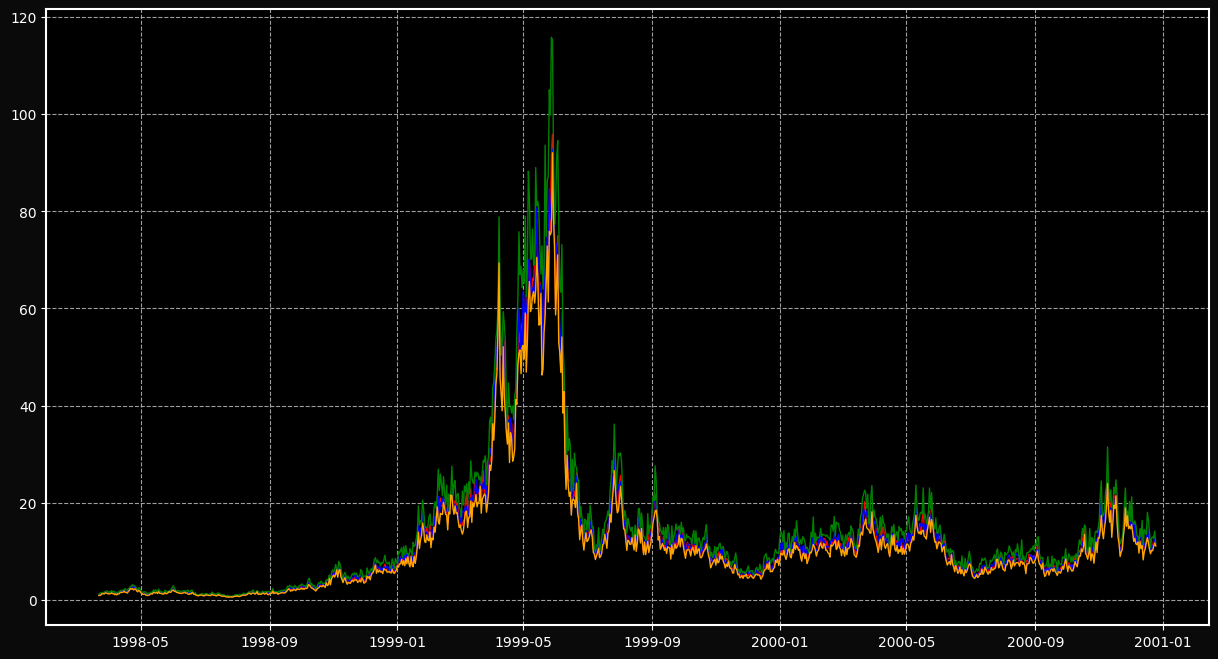

: 

In [59]:
plt.figure(figsize=(15, 8))

plt.plot(fake_data['Open'], c='r')
plt.plot(fake_data['Close'], c='b')
plt.plot(fake_data['High'], c='g')
plt.plot(fake_data['Low'], c='orange')

plt.show()